In [1]:
cd /SNS/users/lj7/dv/sns-chops/resolution/ARCS/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS


In [2]:
#Program to load Vanadium or empty Can powder files and perform a constant-Q cut along the middle Q to look at energy resolution and intensity.
import matplotlib.pyplot as plt
from mantid import plots
from mantid.simpleapi import Load, ConvertToMD, BinMD, ConvertUnits, Rebin
from matplotlib.colors import LogNorm
import numpy as np
import mantid.simpleapi as msa
from mantid import mtd

In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

In [5]:
# ls /SNS/ARCS/IPTS-21387/nexus/

In [6]:
RunNumbers=range(107476,107648)+range(108331,108457) # FC1
print(RunNumbers)
IPTS=21387
datadir="/SNS/ARCS/IPTS-"+str(IPTS)+"/shared/autoreduce/"

[107476, 107477, 107478, 107479, 107480, 107481, 107482, 107483, 107484, 107485, 107486, 107487, 107488, 107489, 107490, 107491, 107492, 107493, 107494, 107495, 107496, 107497, 107498, 107499, 107500, 107501, 107502, 107503, 107504, 107505, 107506, 107507, 107508, 107509, 107510, 107511, 107512, 107513, 107514, 107515, 107516, 107517, 107518, 107519, 107520, 107521, 107522, 107523, 107524, 107525, 107526, 107527, 107528, 107529, 107530, 107531, 107532, 107533, 107534, 107535, 107536, 107537, 107538, 107539, 107540, 107541, 107542, 107543, 107544, 107545, 107546, 107547, 107548, 107549, 107550, 107551, 107552, 107553, 107554, 107555, 107556, 107557, 107558, 107559, 107560, 107561, 107562, 107563, 107564, 107565, 107566, 107567, 107568, 107569, 107570, 107571, 107572, 107573, 107574, 107575, 107576, 107577, 107578, 107579, 107580, 107581, 107582, 107583, 107584, 107585, 107586, 107587, 107588, 107589, 107590, 107591, 107592, 107593, 107594, 107595, 107596, 107597, 107598, 107599, 107600,

# debug

In [7]:
RunNumber = RunNumbers[0]
path = '/SNS/ARCS/IPTS-%s/nexus/ARCS_%s.nxs.h5' % (IPTS, RunNumber)
w = msa.LoadEventNexus(path)
mons = msa.LoadNexusMonitors(path)

In [8]:
mons.getNumberHistograms()

2

In [9]:
RunParams=w.getRun()
Energy=RunParams["BL18:Chop:Skf0:EnergyUserReq"].getStatistics().mean

In [10]:
v = C.e2v(Energy)

In [11]:
LM1 = 11.831
t = LM1/v*1e6
print t

9563.22383736


In [12]:
mon1 = mons.getSpectrum(0)
tofs = mon1.getTofs()
weights = mon1.getWeights()
intensities, tofbbs = np.histogram(tofs, weights=weights, bins=100, range=(t*.8, t*1.2))
tofcenters = (tofbbs[1:]+tofbbs[:-1])/2

<IPython.core.display.Javascript object>


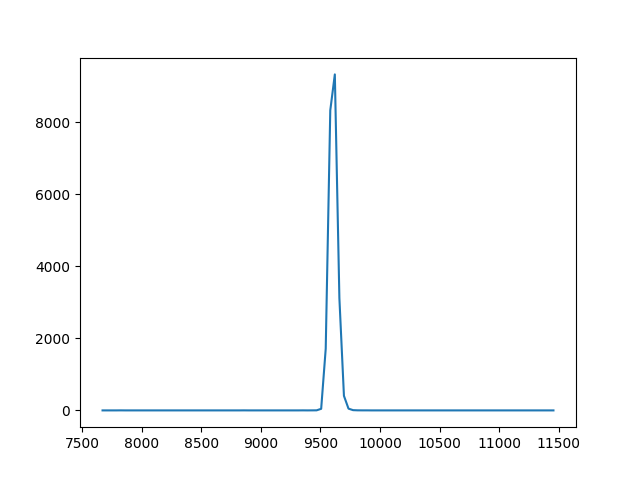

In [13]:
plt.figure()
plt.plot(tofcenters, intensities)

# gather data
**This can be skipped the 2nd time running this notebook**

In [14]:
LM1 = 11.831

In [15]:
%%time
PlotTag=0

data_table = {}

for RunNumber in RunNumbers:
    print (RunNumber)
    path = '/SNS/ARCS/IPTS-%s/nexus/ARCS_%s.nxs.h5' % (IPTS, RunNumber)
    w = msa.LoadEventNexus(path)
    mons = msa.LoadNexusMonitors(path)
    RunParams=w.getRun()
    Energy=RunParams["BL18:Chop:Skf0:EnergyUserReq"].getStatistics().mean
    v = C.e2v(Energy)
    t = LM1/v*1e6
    mon1 = mons.getSpectrum(0)
    tofs = mon1.getTofs()
    weights = mon1.getWeights()
    intensities, tofbbs = np.histogram(tofs, weights=weights, bins=100, range=(t*.8, t*1.2))
    tofcenters = (tofbbs[1:]+tofbbs[:-1])/2
    data_table[RunNumber] = tofcenters, intensities
    continue

107476
107477
107478
107479
107480
107481
107482
107483
107484
107485
107486
107487
107488
107489
107490
107491
107492
107493
107494
107495
107496
107497
107498
107499
107500
107501
107502
107503
107504
107505
107506
107507
107508
107509
107510
107511
107512
107513
107514
107515
107516
107517
107518
107519
107520
107521
107522
107523
107524
107525
107526
107527
107528
107529
107530
107531
107532
107533
107534
107535
107536
107537
107538
107539
107540
107541
107542
107543
107544
107545
107546
107547
107548
107549
107550
107551
107552
107553
107554
107555
107556
107557
107558
107559
107560
107561
107562
107563
107564
107565
107566
107567
107568
107569
107570
107571
107572
107573
107574
107575
107576
107577
107578
107579
107580
107581
107582
107583
107584
107585
107586
107587
107588
107589
107590
107591
107592
107593
107594
107595
107596
107597
107598
107599
107600
107601
107602
107603
107604
107605
107606
107607
107608
107609
107610
107611
107612
107613
107614
107615
107616
107617
107618

## Save

In [16]:
import pickle as pkl

In [17]:
pkl.dump(data_table, open('V_Cali_MonitorInt_FC1_2018_v2_datatable.pkl', 'w'))

# Load data from saved file

In [18]:
data_table = pkl.load(open('./V_Cali_MonitorInt_FC1_2018_v2_datatable.pkl'))

examine data

<IPython.core.display.Javascript object>


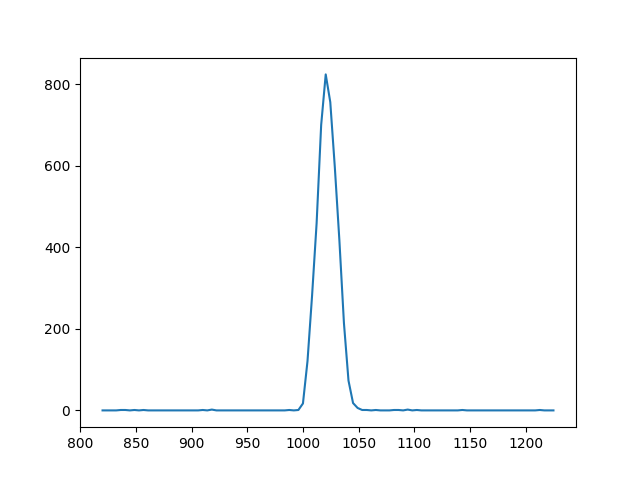

In [19]:
tof,I =  data_table[RunNumbers[50]]
plt.figure()
plt.plot(tof, I)

In [21]:
intensity_data = [(k, I.sum()) for k, (tof, I) in data_table.items()]

In [22]:
intensity_data = np.array(intensity_data)

In [23]:
np.savetxt('V_Cali_MonitorInt_FC1_2018_v2.dat', intensity_data)

# Inspect 

In [24]:
import sys, os
sys.path.insert(0, os.path.abspath('./PyChop/'))

In [25]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop/Vdata2018.pyc'>

In [26]:
expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC1_2018_v2.dat'))

reading data. please wait...
  done


In [27]:
Ei = 250.
condition = np.isclose(expdata.vdata.Energy, Ei)

In [28]:
expdata.chopper_freqs[condition]

array([ 120.,  240.,  360.,  480.,  600.,  180.,  300.,  420.,  540.,   60.])

In [29]:
expdata.vdata.RunNumber[condition]

1      107521.0
27     107547.0
53     107573.0
80     107600.0
107    107627.0
170    108373.0
173    108376.0
176    108379.0
179    108382.0
270    107492.0
Name: RunNumber, dtype: float64

<IPython.core.display.Javascript object>


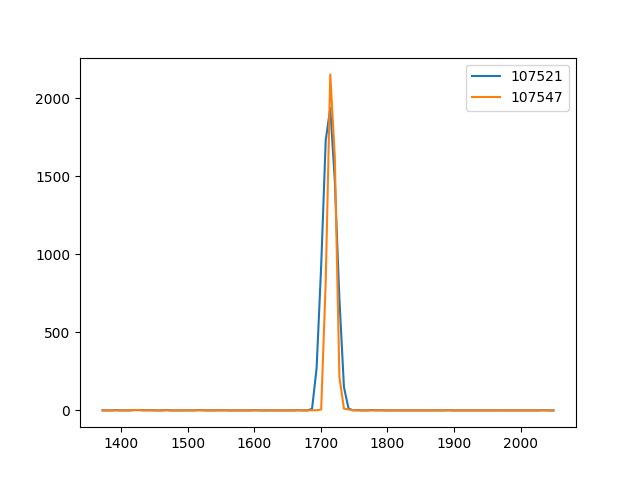

7251.0
4878.0


In [30]:
plt.figure()
for run in [107521, 107547]:
    tof,I =  data_table[run]
    plt.plot(tof, I, label=run)
    print I.sum()
plt.legend()